<a href="https://colab.research.google.com/github/FelipeRuanMarinheiro/Portifolio/blob/main/Regression_Assumptions_Econometrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ANALISES PRESSUPOSTOS
- NORMALIDADE DOS RESIDUOS
- MULTICOLINEARIDADE
- HETEROCEDASTICIDADE


## LIBS


In [1]:
!pip install matplotlib
!pip install pandas
!pip install seaborn
!pip install numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

##ANÁLISE EXPLORATÓRIA

In [2]:
df = pd.read_excel('IDH_2010_base_de_dados.xls')

In [3]:
df

,ano,cod_UF,UF,cod_MUN,mun,esperanca,fecundidade,mortalidade,Mortalidade até 5 anos de idade,Razão de dependência,...,População de 15 a 17 anos.1,População de 18 anos ou mais.1,População total em domicílios particulares permanentes,"População total em domicílios particulares permanentes, exceto com renda nula",Subíndice de escolaridade - IDHM Educação,Subíndice de frequência escolar - IDHM Educação,IDHM,IDHM Educação,IDHM Longevidade,IDHM Renda
0,2010,11,Rondônia,110001,ALTA FLORESTA D'OESTE,70.75,2.24,23.80,25.49,47.37,...,1602,16431,24097,22429,0.368,0.629,0.641,0.526,0.763,0.657
1,2010,11,Rondônia,110002,ARIQUEMES,73.36,1.91,19.20,20.53,46.68,...,5256,60213,89766,88730,0.514,0.648,0.702,0.600,0.806,0.716
2,2010,11,Rondônia,110003,CABIXI,70.39,2.15,24.80,26.58,48.12,...,381,4306,6303,6156,0.357,0.700,0.650,0.559,0.757,0.650
3,2010,11,Rondônia,110004,CACOAL,74.27,1.90,14.30,15.38,43.79,...,4547,54356,78141,76876,0.488,0.698,0.718,0.620,0.821,0.727
4,2010,11,Rondônia,110005,CEREJEIRAS,72.94,2.12,18.10,19.42,45.67,...,1033,11786,16942,16815,0.430,0.712,0.692,0.602,0.799,0.688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5559,2010,52,Goiás,522200,VIANÓPOLIS,74.10,2.10,14.40,17.04,45.11,...,711,8914,12501,12445,0.432,0.747,0.712,0.622,0.818,0.710
5560,2010,52,Goiás,522205,VICENTINÓPOLIS,73.25,2.29,15.70,18.51,42.38,...,380,5190,7288,7239,0.389,0.676,0.684,0.562,0.804,0.707
5561,2010,52,Goiás,522220,VILA BOA,74.07,2.64,14.50,17.09,50.80,...,268,3065,4685,4531,0.431,0.594,0.647,0.534,0.818,0.619
5562,2010,52,Goiás,522230,VILA PROPÍCIO,73.09,2.67,15.90,18.80,50.75,...,314,3476,4739,4523,0.330,0.624,0.634,0.505,0.802,0.629


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5564 entries, 0 to 5563
Columns: 237 entries, ano to IDHM Renda
dtypes: float64(159), int64(76), object(2)
memory usage: 10.1+ MB


In [13]:
# Verificar se existe alguma coluna com valores nulos
any_nulls = df.isnull().any().any()
print(f"valores nulos? {any_nulls}")



valores nulos? False


In [15]:
df.describe()

,ano,cod_UF,cod_MUN,esperanca,fecundidade,mortalidade,Mortalidade até 5 anos de idade,Razão de dependência,Probabilidade de sobrevivência até 40 anos,Probabilidade de sobrevivência até 60 anos,Taxa de envelhecimento,Expectativa de anos de estudo,Taxa de analfabetismo - 11 a 14 anos,Taxa de analfabetismo - 15 a 17 anos,Taxa de analfabetismo - 15 anos ou mais,Taxa de analfabetismo - 18 a 24 anos,Taxa de analfabetismo - 18 anos ou mais,Taxa de analfabetismo - 25 a 29 anos,Taxa de analfabetismo - 25 anos ou mais,% de 6 a 17 anos no básico sem atraso,% de 6 a 14 anos no fundamental sem atraso,% de 15 a 17 anos no médio sem atraso,% de 6 a 17 no básico com 1 ano de atraso,% de 6 a 14 anos no fundamental com 1 ano de atraso,% de 15 a 17 no médio com 1 ano de atraso,% de 6 a 17 anos no básico com 2 anos ou mais de atraso,% de 6 a 14 anos no fundamental com 2 anos ou mais de atraso,% de 15 a 17 anos no médio com 2 anos de atraso,Taxa de frequência bruta ao básico,Taxa de frequência bruta ao fundamental,Taxa de frequência bruta ao médio,Taxa de frequência bruta à pré-escola,Taxa de frequência bruta ao superior,Taxa de frequência líquida ao básico,Taxa de frequência líquida ao fundamental,Taxa de frequência líquida ao médio,Taxa de frequência líquida à pré-escola,Taxa de frequência líquida ao superior,% de 0 a 3 anos na escola,% de 11 a 14 anos na escola,% de 15 a 17 anos na escola,% de 18 a 24 anos na escola,% de 25 a 29 anos na escola,% de 4 a 5 anos na escola,% de 4 a 6 anos na escola,% de 5 a 6 anos na escola,% de 6 anos na escola,% de 6 a 14 anos na escola,% de 6 a 17 anos na escola,% de 15 a 17 anos no fundamental,% de 18 a 24 anos no fundamental,% de 4 a 5 anos no fundamental,% de 18 a 24 anos no médio,% de 6 a 14 anos no médio,% de 15 a 17 anos no superior,% de 11 a 13 anos nos anos finais do fundamental ou com fundamental completo,% de 12 a 14 anos nos anos finais do fundamental ou com fundamental completo,% de 15 a 17 anos com fundamental completo,% de 16 a 18 anos com fundamental completo,% de 18 a 24 anos com fundamental completo,% de 18 anos ou mais com fundamental completo,% de 25 anos ou mais com fundamental completo,% de 18 a 20 anos com médio completo,% de 18 a 24 anos com médio completo,% de 18 anos ou mais com médio completo,% de 19 a 21 anos com médio completo,% de 25 anos ou mais com médio completo,% de 25 anos ou mais com superior completo,Renda per capita máxima do 1º quinto mais pobre,Renda per capita máxima do 2° quinto mais pobre,Renda per capita máxima do 3° quinto mais pobre,Renda per capita máxima do 4°quinto mais pobre,Renda per capita mínima do décimo mais rico,Índice de Gini,% de extremamente pobres,% de crianças extremamente pobres,% de pobres,% de crianças pobres,% de vulneráveis à pobreza,% de crianças vulneráveis à pobreza,Percentual da renda apropriada pelos 10% mais ricos,Percentual da renda apropriada pelos 20% mais pobres,Percentual da renda apropriada pelos 20% mais ricos,Percentual da renda apropriada pelos 40% mais pobres,Percentual da renda apropriada pelos 60% mais pobres,Percentual da renda apropriada pelos 80% mais pobres,% da renda proveniente de rendimentos do trabalho,Razão 10% mais ricos / 40% mais pobres,Razão 20% mais ricos / 40% mais pobres,Renda per capita,Renda per capita média do 1º quinto mais pobre,Renda per capita média do décimo mais rico,Renda per capita média do 2º quinto mais pobre,Renda per capita média do 3º quinto mais pobre,Renda per capita média do 4º quinto mais pobre,Renda per capita média do quinto mais rico,"Renda per capita , exceto renda nula",Renda per capita média dos extremamente pobres,Renda per capita média dos pobres,Renda per capita média dos vulneráveis à pobreza,Índice de Theil - L,% de trabalhadores por conta própria - 18 anos ou mais,% de empregadores - 18 anos ou mais,% dos ocupados no setor agropecuário - 18 anos ou mais,% dos ocupados no setor comércio - 18 anos ou mais,% dos ocupados no setor de construção - 18 anos ou mais,% dos ocupados no setor e

##Regressão linear

###Regressão linear com STATSMODELS

In [16]:
#USANDO STATSMODELS


# Definição das variáveis independentes (X) e dependentes (y)
X = df['esperanca']
y = df['mortalidade']

# Adicionar uma constante para o intercepto
X = sm.add_constant(X)

# Ajustar o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Exibir o resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            mortalidade   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 8.034e+04
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        17:41:14   Log-Likelihood:                -11214.
No. Observations:                5564   AIC:                         2.243e+04
Df Residuals:                    5562   BIC:                         2.245e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.4215      0.664    312.229      0.0

###Regressão linear com SCIKITLEARN

In [36]:
#USANDO SCIKITLEARN

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Supondo que seu DataFrame se chame `df`
# Primeiro, remover quaisquer linhas com valores nulos
df = df.dropna(subset=['esperanca', 'mortalidade'])

# Definir as variáveis independentes (X) e dependentes (y)
X = df[['esperanca']]  # scikit-learn espera uma matriz 2D para X
y = df['mortalidade']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de regressão linear
model = LinearRegression()

# Ajustar o modelo aos dados de treino
model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Coeficientes do modelo
print(f"Intercepto: {model.intercept_}")
print(f"Coeficiente: {model.coef_}")


Mean Squared Error: 3.3033013120298294
R-squared: 0.9346556314255605
Intercepto: 207.65027060416799
Coeficiente: [-2.57775444]


###Analise dos residuos

#### Residuos vs Valores ajustados

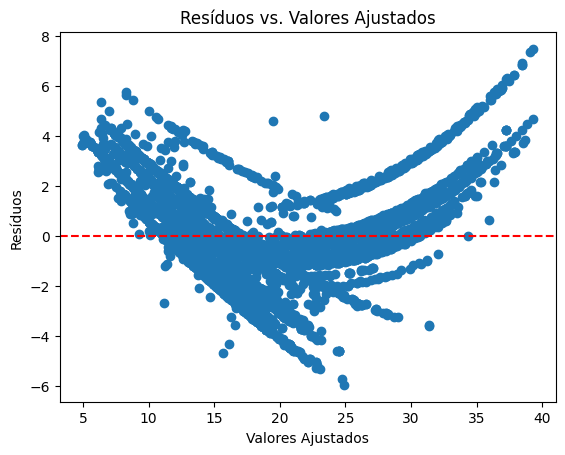

In [18]:
import matplotlib.pyplot as plt

# Prever valores ajustados e calcular resíduos
y_pred = model.predict(X)
residuals = y - y_pred

# Gráfico de resíduos vs. valores ajustados
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Resíduos vs. Valores Ajustados')
plt.show()


#### Histograma residuos

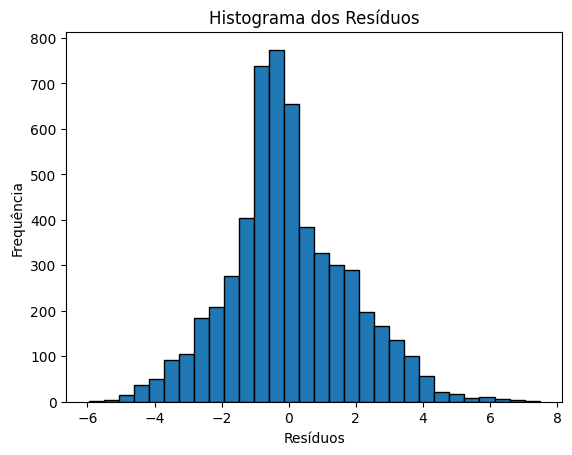

In [19]:
# Histograma dos resíduos
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos')
plt.show()


#### Grafico QQ PLOT quantile

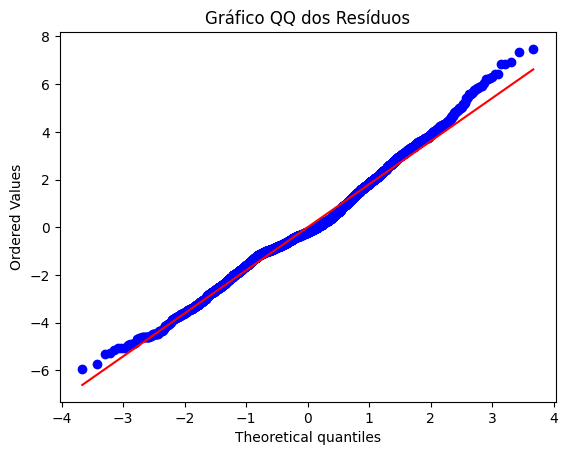

In [20]:
import scipy.stats as stats

# Gráfico QQ dos resíduos
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Gráfico QQ dos Resíduos')
plt.show()


#### Gráfico de resíduos vs. variável independente

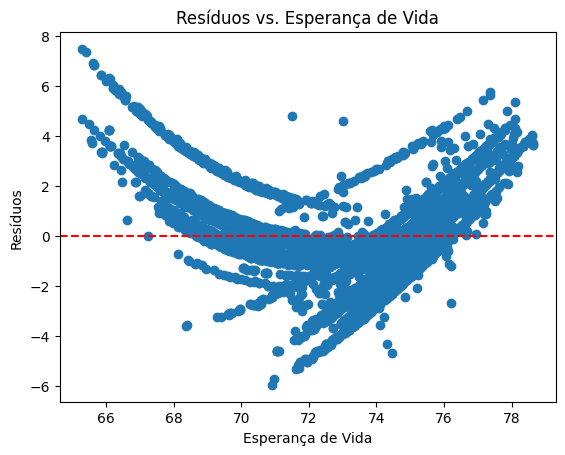

In [21]:
# Gráfico de resíduos vs. variável independente
plt.scatter(X, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Esperança de Vida')
plt.ylabel('Resíduos')
plt.title('Resíduos vs. Esperança de Vida')
plt.show()


#### Grafico resíduos padronizados

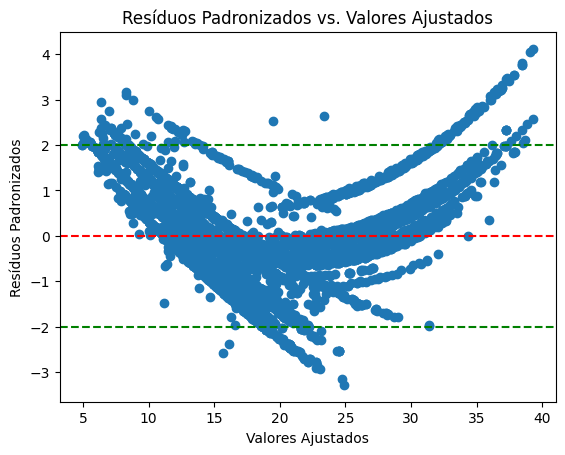

In [22]:
# Calcular resíduos padronizados
residuals_standardized = (residuals - residuals.mean()) / residuals.std()

# Gráfico de resíduos padronizados
plt.scatter(y_pred, residuals_standardized)
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=2, color='g', linestyle='--')
plt.axhline(y=-2, color='g', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos Padronizados')
plt.title('Resíduos Padronizados vs. Valores Ajustados')
plt.show()


####SHAPIRO WILK (NORMALIDADE RESIDUOS)

In [27]:
from scipy.stats import shapiro

stat, p_value = shapiro(residuals)
print(f'Teste de Shapiro-Wilk: Estatística={stat}, p-valor={p_value}')

# Interpretação do p-valor
alpha = 0.05
if p_value > alpha:
    print('A amostra parece vir de uma distribuição normal (falha em rejeitar H0)')
else:
    print('A amostra não parece vir de uma distribuição normal (rejeita H0)')

Teste de Shapiro-Wilk: Estatística=0.9881214499473572, p-valor=3.0336808575703943e-21
A amostra não parece vir de uma distribuição normal (rejeita H0)


####Durbin watson (INDEPENDENCIA DOS RESIDUOS)

In [23]:
from statsmodels.stats.stattools import durbin_watson

# Calcular o valor do teste de Durbin-Watson
dw = durbin_watson(residuals)
print(f'Teste de Durbin-Watson: {dw}')


Teste de Durbin-Watson: 1.093487753638344


####Heterocedasticidade

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.diagnostic import het_breuschpagan



# Definir as variáveis independentes (X) e dependentes (y)
X = df[['esperanca']]  # scikit-learn espera uma matriz 2D para X
y = df['mortalidade']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de regressão linear
model = LinearRegression()

# Ajustar o modelo aos dados de treino
model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

# Calcular os resíduos
residuals = y_test - y_pred


# Adicionar uma coluna de uns para representar a constante
X_test_with_const = np.column_stack([np.ones(len(X_test)), X_test])

# Executar o teste de Breusch-Pagan nos resíduos
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(residuals, X_test_with_const)

# Exibir os resultados
print(f"Valor da estatística LM: {lm}")
print(f"P-valor para a estatística LM: {lm_p_value}")
print(f"Valor da estatística F: {fvalue}")
print(f"P-valor para a estatística F: {f_p_value}")


Valor da estatística LM: 0.4102456725154091
P-valor para a estatística LM: 0.521844838034607
Valor da estatística F: 0.409659481755865
P-valor para a estatística F: 0.522274356687269
